In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Create a set of random latitue and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates= list(lat_lngs)

In [4]:
#use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#cities2 = ['chicago','london']
# Create an empty list ot hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >50):
        set_count += 1
        record_count = 1
        
    # create endpoint URL with each city. 
    city_url = url + "&q=" + city.replace(" ","+") 
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
                         
                
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | qasigiannguit
Processing Record 3 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | yerbogachen
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | arkhara
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | chuka
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | fano
Processing Record 16 of Set 1 | olinda
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | qafsah
City not found. Skipping...
Processing Record 22 of Set 1 | amderma
Ci

Processing Record 39 of Set 3 | karratha
Processing Record 40 of Set 3 | hami
Processing Record 41 of Set 3 | bathsheba
Processing Record 42 of Set 3 | shibetsu
Processing Record 43 of Set 3 | mlonggo
Processing Record 44 of Set 3 | alexandria
Processing Record 45 of Set 3 | clyde river
Processing Record 46 of Set 3 | esperance
Processing Record 47 of Set 3 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 3 | tuatapere
Processing Record 49 of Set 3 | traverse city
Processing Record 50 of Set 3 | alice town
Processing Record 1 of Set 4 | sulangan
Processing Record 2 of Set 4 | klamath falls
Processing Record 3 of Set 4 | port hardy
Processing Record 4 of Set 4 | latung
Processing Record 5 of Set 4 | opuwo
Processing Record 6 of Set 4 | ambulu
Processing Record 7 of Set 4 | anadyr
Processing Record 8 of Set 4 | umm lajj
Processing Record 9 of Set 4 | ijaki
City not found. Skipping...
Processing Record 10 of Set 4 | porto walter
Processing Record 11 of Set 

Processing Record 25 of Set 7 | qostanay
Processing Record 26 of Set 7 | gao
Processing Record 27 of Set 7 | sawakin
Processing Record 28 of Set 7 | zhongshu
Processing Record 29 of Set 7 | jiwani
Processing Record 30 of Set 7 | burica
City not found. Skipping...
Processing Record 31 of Set 7 | burhaniye
Processing Record 32 of Set 7 | bosaso
Processing Record 33 of Set 7 | andrews
Processing Record 34 of Set 7 | garchitorena
Processing Record 35 of Set 7 | silleda
Processing Record 36 of Set 7 | fort nelson
Processing Record 37 of Set 7 | saskylakh
Processing Record 38 of Set 7 | hangu
Processing Record 39 of Set 7 | sneek
Processing Record 40 of Set 7 | santa isabel do rio negro
Processing Record 41 of Set 7 | saleaula
City not found. Skipping...
Processing Record 42 of Set 7 | burgos
Processing Record 43 of Set 7 | gongzhuling
Processing Record 44 of Set 7 | severo-kurilsk
Processing Record 45 of Set 7 | valparaiso
Processing Record 46 of Set 7 | salinas
Processing Record 47 of Set 

Processing Record 16 of Set 11 | kuche
City not found. Skipping...
Processing Record 17 of Set 11 | palmer
Processing Record 18 of Set 11 | buala
Processing Record 19 of Set 11 | maturin
Processing Record 20 of Set 11 | three hills
Processing Record 21 of Set 11 | raudeberg
Processing Record 22 of Set 11 | krk
Processing Record 23 of Set 11 | moindou
Processing Record 24 of Set 11 | fairfield
Processing Record 25 of Set 11 | erenhot
Processing Record 26 of Set 11 | road town
Processing Record 27 of Set 11 | roald
Processing Record 28 of Set 11 | ardesen
Processing Record 29 of Set 11 | bilibino
Processing Record 30 of Set 11 | togur
Processing Record 31 of Set 11 | yuxia
Processing Record 32 of Set 11 | karasjok
Processing Record 33 of Set 11 | ambon
Processing Record 34 of Set 11 | boa esperanca
Processing Record 35 of Set 11 | kysyl-syr
Processing Record 36 of Set 11 | bobo dioulasso
Processing Record 37 of Set 11 | naze
Processing Record 38 of Set 11 | xianshuigu
Processing Record 3

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaries to a PANDAS DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,75.52,84,20,14.97,US,2021-10-23 16:49:13
1,Qasigiannguit,68.8193,-51.1922,19.65,94,100,5.08,GL,2021-10-23 16:49:13
2,Kahului,20.8947,-156.4700,75.85,80,40,9.22,US,2021-10-23 16:49:14
3,Yerbogachen,61.2767,108.0108,32.40,79,94,11.39,RU,2021-10-23 16:49:14
4,Carnarvon,-24.8667,113.6333,69.87,68,0,17.27,AU,2021-10-23 16:49:14
5,Ushuaia,-54.8000,-68.3000,44.22,87,90,24.16,AR,2021-10-23 16:49:15
6,Arkhara,49.4212,130.0842,35.85,83,3,2.93,RU,2021-10-23 16:49:15
7,Albany,42.6001,-73.9662,54.63,60,63,1.01,US,2021-10-23 16:48:31
8,Thompson,55.7435,-97.8558,32.16,86,90,0.00,CA,2021-10-23 16:49:16
9,Chuy,-33.6971,-53.4616,62.80,68,100,1.83,UY,2021-10-23 16:49:16


In [12]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humididty, Cloudines and Wind Speed so they are easy to read

#assign a variable to an array of the columns in the order we want them to appear
#new_column_order = ["column1", "column8", "colcolumn2", "column3", "column4", "column5", "column6", "column7"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Then, assign a new or same DataFrame with new column order: 
#city_data_df = city_data_df[new_column_order]


In [13]:
# Then, assign a new or same DataFrame with new column order: 
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-23 16:49:13,22.0752,-159.3190,75.52,84,20,14.97
1,Qasigiannguit,GL,2021-10-23 16:49:13,68.8193,-51.1922,19.65,94,100,5.08
2,Kahului,US,2021-10-23 16:49:14,20.8947,-156.4700,75.85,80,40,9.22
3,Yerbogachen,RU,2021-10-23 16:49:14,61.2767,108.0108,32.40,79,94,11.39
4,Carnarvon,AU,2021-10-23 16:49:14,-24.8667,113.6333,69.87,68,0,17.27
5,Ushuaia,AR,2021-10-23 16:49:15,-54.8000,-68.3000,44.22,87,90,24.16
6,Arkhara,RU,2021-10-23 16:49:15,49.4212,130.0842,35.85,83,3,2.93
7,Albany,US,2021-10-23 16:48:31,42.6001,-73.9662,54.63,60,63,1.01
8,Thompson,CA,2021-10-23 16:49:16,55.7435,-97.8558,32.16,86,90,0.00
9,Chuy,UY,2021-10-23 16:49:16,-33.6971,-53.4616,62.80,68,100,1.83


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-23 16:49:13,22.0752,-159.3190,75.52,84,20,14.97
1,Qasigiannguit,GL,2021-10-23 16:49:13,68.8193,-51.1922,19.65,94,100,5.08
2,Kahului,US,2021-10-23 16:49:14,20.8947,-156.4700,75.85,80,40,9.22
3,Yerbogachen,RU,2021-10-23 16:49:14,61.2767,108.0108,32.40,79,94,11.39
4,Carnarvon,AU,2021-10-23 16:49:14,-24.8667,113.6333,69.87,68,0,17.27


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

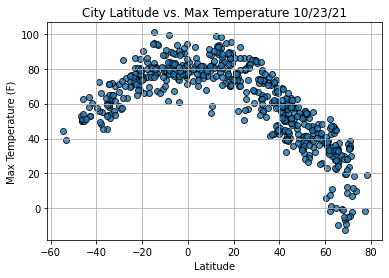

In [17]:
# Import time module
import time

# Build a scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

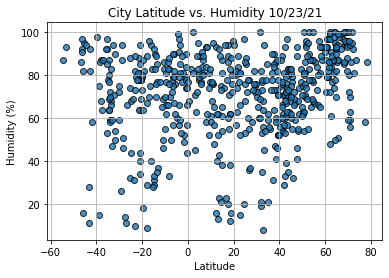

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

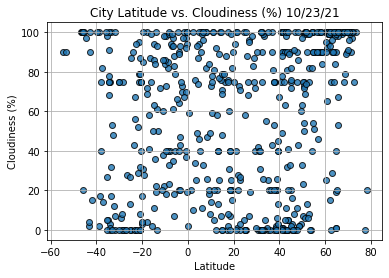

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

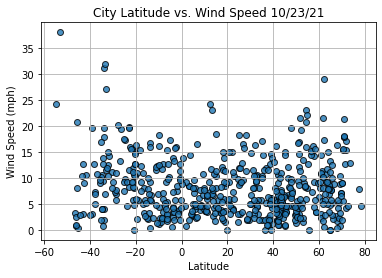

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot of the x and y values and plot the regression line with the x-values and the y coordinates based 
    # on the intercept and slope
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:3f}")

In [22]:
#index13 = city_data_df.loc[13]
#index13

In [23]:
city_data_df["Lat"] >= 0


0       True
1       True
2       True
3       True
4      False
       ...  
556     True
557    False
558    False
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-23 16:49:13,22.0752,-159.3190,75.52,84,20,14.97
1,Qasigiannguit,GL,2021-10-23 16:49:13,68.8193,-51.1922,19.65,94,100,5.08
2,Kahului,US,2021-10-23 16:49:14,20.8947,-156.4700,75.85,80,40,9.22
3,Yerbogachen,RU,2021-10-23 16:49:14,61.2767,108.0108,32.40,79,94,11.39
6,Arkhara,RU,2021-10-23 16:49:15,49.4212,130.0842,35.85,83,3,2.93


In [25]:
# Create Northern and Southern Hemispheres' data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

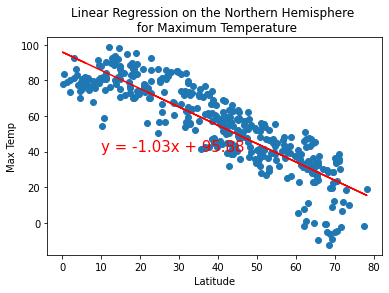

The r-value is -0.873945


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,40))
                        #for Maximum Temperature", "Max Temp",(10,40))



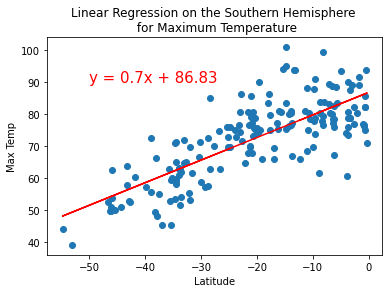

The r-value is 0.774041


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function.
plot_linear_regression(x_values, y_values,  
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-50,90))
                    

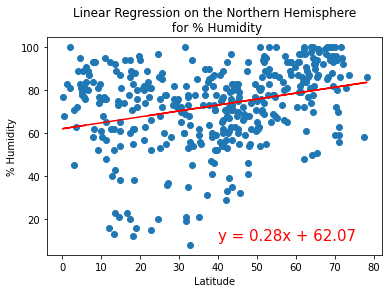

The r-value is 0.293015


In [28]:
###### NEED to CHANGE Y LABEL to Humidity
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity",(40,10))

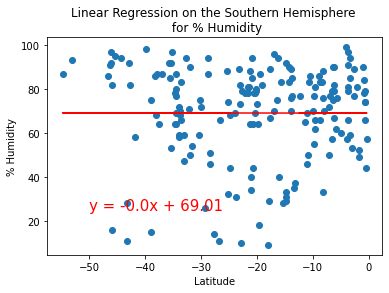

The r-value is -0.001567


In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25));
                        

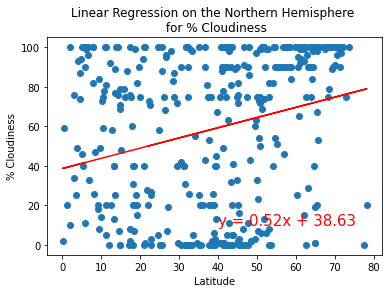

The r-value is 0.266153


In [51]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(40,10))

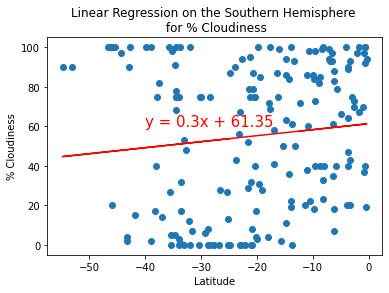

The r-value is 0.112856


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-40,60))
                      

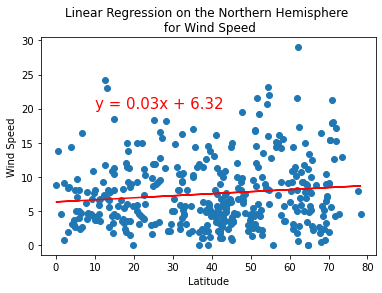

The r-value is 0.119536


In [59]:
# Linear regression on the Northern Hemisphere
##### Need to get the equation to show up for this one
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,20))

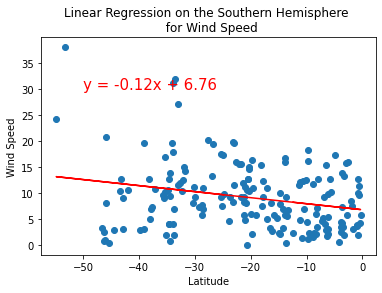

The r-value is -0.248561


In [60]:
# Linear regression on the Southern Hemisphere
# Need to make bigger to see the equation
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for Wind Speed', 'Wind Speed',(-50,30))
                       